In [50]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


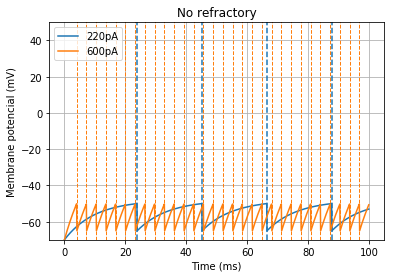

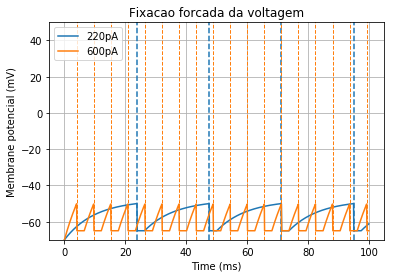

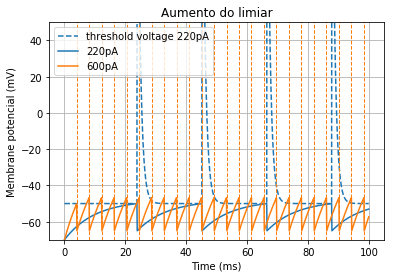

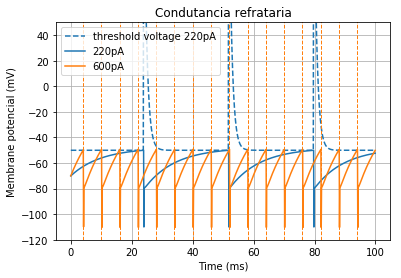

In [64]:
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100 * b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL
refractory_time = 2.5*b2.ms

refractory_time_0 =  2.5*b2.ms
tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV

tau_refractory =  1.0*b2.ms
Vth_reset =  200*b2.mV

E_k = -80*b2.mV
tau_Gref = 0.2*b2.ms
deltaG = 2*b2.usiemens
Gref_0 = 0*b2.siemens

simulation_time = 100
dt =  0.1 * b2.ms 

current = [220, 600]
v_reset_high = 50*b2.mV

#
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt=dt)
neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

plt.figure(1)
for t in spike_monitor.spike_trains()[0]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C0', lw=1.5)
plt.plot(state_monitor.t/b2.ms,state_monitor.v[0]/b2.mV, label='220pA') 
for t in spike_monitor.spike_trains()[1]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C1', lw=1)
plt.plot(state_monitor.t/b2.ms,state_monitor.v[1]/b2.mV, label='600pA') 
plt.ylim((-70, 50))
plt.title('No refractory')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potencial (mV)')
plt.grid()
plt.legend()

eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt (unless refractory)
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=refractory_time, method="euler")

neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

plt.figure(2)
for t in spike_monitor.spike_trains()[0]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C0', lw=1.5)
plt.plot(state_monitor.t/b2.ms,state_monitor.v[0]/b2.mV, label='220pA') 
for t in spike_monitor.spike_trains()[1]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C1', lw=1) 
plt.plot(state_monitor.t/b2.ms,state_monitor.v[1]/b2.mV, label='600pA') 
plt.ylim((-70, 50))
plt.title('Fixacao forcada da voltagem')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potencial (mV)')
plt.grid()
plt.legend()

#
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt 
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset; Vth=Vth_reset", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

plt.figure(3)
plt.plot(state_monitor.t/b2.ms,state_monitor.Vth[0]/b2.mV, "--", c='C0', label='threshold voltage 220pA') 
# for t in spike_monitor.spike_trains()[0]:
#     plt.axvline(t/b2.ms,0,50, ls='--', c='C0', lw=1.5)
plt.plot(state_monitor.t/b2.ms,state_monitor.v[0]/b2.mV, c='C0', label='220pA') 
for t in spike_monitor.spike_trains()[1]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C1', lw=1)
# plt.plot(state_monitor.t/b2.ms,state_monitor.Vth[1]/b2.mV, "--", c='C1', label='threshold voltage 600pA')
plt.plot(state_monitor.t/b2.ms,state_monitor.v[1]/b2.mV,c='C1', label='600pA') 
plt.ylim((-70, 50))
plt.title('Aumento do limiar')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potencial (mV)')
plt.grid()
plt.legend()

#
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (current/membrane_capacitance) ) : volt
dVth/dt = (firing_threshold - Vth)/tau_refractory :  volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset=" Vth=Vth_reset; Gref=Gref+deltaG", threshold="v>Vth",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Vth = firing_threshold
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Vth", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

plt.figure(4)
plt.plot(state_monitor.t/b2.ms,state_monitor.Vth[0]/b2.mV, "--", c='C0', label='threshold voltage 220pA') 
# for t in spike_monitor.spike_trains()[0]:
#     plt.axvline(t/b2.ms,0,50, ls='--', c='C0', lw=1.5)
plt.plot(state_monitor.t/b2.ms,state_monitor.v[0]/b2.mV, c='C0', label='220pA') 
for t in spike_monitor.spike_trains()[1]:
    plt.axvline(t/b2.ms,0,50, ls='--', c='C1', lw=1)
# plt.plot(state_monitor.t/b2.ms,state_monitor.Vth[1]/b2.mV, "--", c='C1', label='threshold voltage 600pA')
plt.plot(state_monitor.t/b2.ms,state_monitor.v[1]/b2.mV, c='C1',label='600pA') 
plt.ylim((-120, 50))
plt.title('Condutancia refrataria')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potencial (mV)')
plt.grid()
plt.legend()


plt.show()
